In [1]:
# # Clear all and restrart the runtime
# # import sys
# # sys.modules[__name__].__dict__.clear()
# %reset -f

In [2]:
# import os
# import shutil

# directory_path = "/kaggle/working/ReviseCode/ResultsFile/Images"

# # Iterate through files and subdirectories in the directory
# for item in os.listdir(directory_path):
#     item_path = os.path.join(directory_path, item)
#     if os.path.isfile(item_path):
#         # Remove files
#         os.remove(item_path)
#     elif os.path.isdir(item_path):
#         # Remove subdirectories and their contents
#         shutil.rmtree(item_path)


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
log_dir = '/kaggle/working/ReviseCode/ResultsFile'
user_name = 'Moodi_mixSVM(sel=50_3)_2021_2class_No_smote(k_n=8)_knn=5'
comment = 'mixSVM(sel=50_3)_2021_2class_smote(k_n=8)_knn=5'

In [5]:
# import os

# os.makedirs('/kaggle/working/ReviseCode/ResultsFile/Images/')

##Import Packages

In [6]:
from sklearn.metrics import log_loss
from sklearn.metrics import log_loss

In [7]:
import datetime  # Import the datetime module

# Generate a timestamp
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d_%H-%M-%S")

# Print the timestamp
print(timestamp)

2023-10-02_17-15-19


In [8]:
from imblearn.pipeline import Pipeline as imbpipeline
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [10]:
from scikitplot.metrics import plot_roc_curve

In [11]:
! pip install eli5
! pip install scikeras


In [12]:
import numpy as np
# import pyreadstat
import tensorflow as tf
import pandas as pd
from scikeras.wrappers import KerasClassifier
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score ,precision_score ,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
# import eli5
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV, LeaveOneOut, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeClassifier, ElasticNet
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 ,mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from warnings import filterwarnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from eli5.sklearn import PermutationImportance
filterwarnings('ignore')
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from keras.layers import Dropout
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import os
# from sklearn.metrics import plot_roc_curve

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import make_scorer, accuracy_score

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import plot_roc_curve
sns.set(style="white", color_codes=True)

## Import dataset

In [13]:
# /content/drive/MyDrive/nimad/TrainTest2021.xlsx
# /content/drive/MyDrive/nimad/Train_test_Tomas2021.xlsx
# /content/drive/MyDrive/nimad/2021_V4.xlsx

In [14]:
dataset=pd.read_excel('/kaggle/input/nimad2/2021_V4 (2).xlsx')
dataset.head(5)

,Grade,Gender,Age,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,...,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
0,4,male,67,18260,2310.0,44514.0,20570.0,65084.0,1173833.0,7.904762,...,0.36456,0.075098,2621.2677,13.78400,3.34375,1.490000e-07,0.107207,0.072861,0.068678,71.8335
1,3,female,44,224,23189.0,27760.0,23413.0,51173.0,1260788.0,0.009660,...,0.18073,1.307600,929.5049,0.88673,6.21875,1.000000e-09,0.080780,0.110770,0.086151,134.2240
2,3,male,37,0,56656.0,53412.0,56656.0,110068.0,1519727.0,0.000000,...,0.22027,0.954110,1633.6341,1.00630,4.31250,1.730000e-08,0.149627,0.122584,0.123256,103.5330
3,2,male,50,0,77985.0,117448.0,77985.0,195433.0,1421096.0,0.000000,...,0.18298,3.587700,929.9761,0.22885,1.00000,3.730000e-08,0.085451,0.120182,0.070426,272.2830
4,3,male,39,1276,110787.0,118819.0,112063.0,230882.0,1469438.0,0.011518,...,0.19252,4.422400,993.2698,0.17378,4.12500,8.810000e-09,0.152095,0.134249,0.066403,322.4030


In [15]:
dataset["Age"].isna().any()

False

In [16]:
dataset.describe()

,Grade,Age,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,...,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
count,237.000000,237.000000,2.370000e+02,237.000000,237.000000,237.000000,237.000000,2.370000e+02,237.000000,235.000000,...,2.370000e+02,237.000000,237.000000,237.000000,237.000000,2.370000e+02,237.000000,237.000000,237.000000,237.000000
mean,3.476793,52.936709,2.554173e+04,32960.536817,56081.295796,53760.185757,109841.484425,1.472689e+06,3.908118,0.533614,...,3.224223e-01,0.980171,2306.176960,6.843372,2.661247,3.580488e-04,0.122552,0.111352,0.109596,179.754802
std,0.773289,15.184745,7.555719e+04,44324.018782,40973.200793,47289.414183,68092.012933,2.038458e+05,8.587303,1.046058,...,1.366081e-01,1.694575,1130.903340,13.715571,4.871793,5.510410e-03,0.034506,0.030337,0.308796,151.706183
min,2.000000,17.000000,0.000000e+00,4.225607,0.000000,0.024517,0.808630,1.913700e-01,0.000000,0.000000,...,7.500000e-07,0.010412,0.048312,0.035506,1.000000,1.000000e-09,0.063045,0.048965,0.041357,0.124982
25%,3.000000,43.000000,1.585000e+03,5991.000000,25665.000000,20113.000000,56512.000000,1.365237e+06,0.048411,0.037942,...,2.338300e-01,0.170590,1579.587000,0.804800,1.000000,1.000000e-09,0.090486,0.088482,0.069788,68.286500
50%,4.000000,54.000000,1.356600e+04,15982.000000,47101.000000,40001.000000,97212.000000,1.456345e+06,1.564969,0.284194,...,2.871500e-01,0.444700,2111.186200,2.278700,1.000000,1.940000e-08,0.128499,0.110702,0.089244,145.787000
75%,4.000000,63.000000,3.124900e+04,38973.000000,76402.000000,75527.000000,156997.000000,1.567580e+06,4.161332,0.661779,...,3.937500e-01,1.128100,2821.936200,5.513300,3.312500,1.100000e-07,0.153738,0.135382,0.109827,244.260000
max,4.000000,84.000000,1.123868e+06,312386.000000,213963.000000,330571.000000,361783.000000,2.316271e+06,76.216216,12.089375,...,1.008100e+00,19.860000,7341.642100,107.594700,68.903000,8.483180e-02,0.178609,0.183424,4.829910,719.238000


In [17]:
dataset.dtypes

Grade            int64
Gender          object
Age              int64
VOLUME_ET        int64
VOLUME_NET     float64
                ...   
TGM_dw         float64
TGM_Cog_X_1    float64
TGM_Cog_Y_1    float64
TGM_Cog_Z_1    float64
TGM_T_1        float64
Length: 707, dtype: object

## detect missvalue

In [18]:

dataset.isna().any().any()

True

In [19]:
#Hzaf nemoone hayee ke sotoon target meghdar nadare

dataset.Grade.isna().sum()

0

In [20]:
dataset= dataset.dropna(subset = ['Grade'])
dataset.Grade.isna().sum()

0

In [21]:
dataset.nunique()

Grade            3
Gender           2
Age             63
VOLUME_ET      205
VOLUME_NET     237
              ... 
TGM_dw          99
TGM_Cog_X_1    236
TGM_Cog_Y_1    237
TGM_Cog_Z_1    237
TGM_T_1        215
Length: 707, dtype: int64

## Delete redundant Columns

In [22]:
# print(dataset.shape)
# dataset=dataset.drop(['ID','Date','Test_Train','TCGA-Dataset','Subtype','Subtype_Grade','neoplasm_histologic_grade'],axis=1)
print(dataset.shape)

(237, 707)


In [23]:
dataset['Grade']=dataset['Grade'].replace(2,0)
dataset['Grade']=dataset['Grade'].replace(3,1)
dataset['Grade']=dataset['Grade'].replace(4,1)
dataset['Grade']

0      1
1      1
2      1
3      0
4      1
      ..
232    1
233    1
234    1
235    1
236    1
Name: Grade, Length: 237, dtype: int64

## Suffel Dataset

In [24]:
dataset=dataset.sample(frac=1, random_state= 42)

In [25]:
# Using iloc to get the row index
row_index, col_index = (dataset.values == 0.600040).nonzero()

if len(row_index) > 0:
    row = row_index[0]
    col = col_index[0]

    # Assuming 'Age' and 'Gender' are the column names
    age = dataset.loc[row, 'Age']
    gender = dataset.loc[row, 'Gender']

    print("Age:", age)
    print("Gender:", gender)
else:
    print("Value not found")



Value not found


## Pre-processing Dataset

### Encode Categorical Features


In [26]:
dataset['Gender']=dataset['Gender'].replace('female',0)
dataset['Gender']=dataset['Gender'].replace('male',1)
dataset['Gender']

115    0
15     1
211    1
126    1
6      0
      ..
106    0
14     0
92     0
179    0
102    0
Name: Gender, Length: 237, dtype: int64

## X,Y dataset

In [27]:
X = dataset.drop(['Grade'], axis=1)
y = dataset['Grade']
print(X.shape , y.shape)

(237, 706) (237,)


### Scale Data

In [28]:
dataset.dtypes

Grade            int64
Gender           int64
Age              int64
VOLUME_ET        int64
VOLUME_NET     float64
                ...   
TGM_dw         float64
TGM_Cog_X_1    float64
TGM_Cog_Y_1    float64
TGM_Cog_Z_1    float64
TGM_T_1        float64
Length: 707, dtype: object

In [29]:
# # Define the line number from where the test data starts
# test_start_line = 208

# # Select the rows for training data (from the beginning to test_start_line - 1)
# train_data = dataset[:test_start_line - 1]
# train_data.head(5)


In [30]:
# # # Select the rows for test data (from test_start_line to the end)
# test_data = dataset[test_start_line:]
# test_data.head(5)

([<matplotlib.axis.XTick at 0x7ea7f02f6170>,
 [Text(0, 0, 'LGG'), Text(1, 0, 'HGG')])

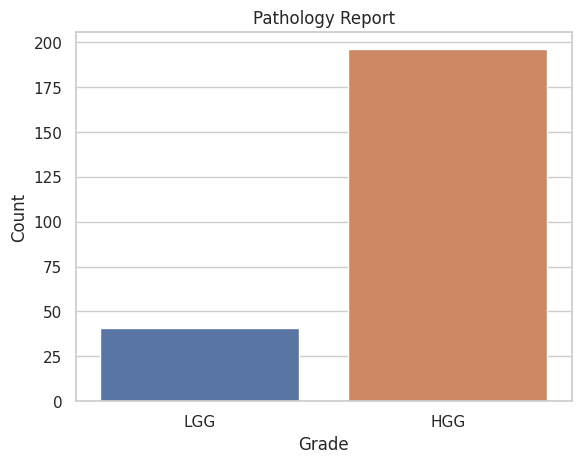

In [31]:
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.countplot(x=dataset['Grade'])
plt.title('Pathology Report')
plt.ylabel('Count')

plt.xticks([0, 1], ['LGG', 'HGG'])

In [32]:

# X_train = train_data.drop(['Grade'], axis=1)
# y_train = train_data['Grade']
# print(X_train.shape , y_train.shape)

In [33]:
# X_test = test_data.drop(['Grade'], axis=1)
# y_test = test_data['Grade']
# print(X_test.shape , y_test.shape)

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test= train_test_split(X, y ,test_size=0.12, stratify= y,random_state=44 , shuffle=True)

In [35]:
print(
X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(208, 706) (29, 706) (208,) (29,)


In [36]:
# Extract the 'Gender' and 'Age' columns into separate DataFrames
gender_train = X_train['Gender']
gender_test = X_test['Gender']
# Set a threshold for Age
X_train['Age'] = X_train['Age'].apply(lambda x: 1 if x > 60 else 0)
X_test['Age'] = X_test['Age'].apply(lambda x: 1 if x > 60 else 0)
age_train = X_train['Age']
age_test = X_test['Age']

In [37]:
X_train = X_train.drop(['Gender', 'Age'], axis=1)
X_test = X_test.drop(['Gender', 'Age'], axis=1)

In [38]:
print(
X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(208, 704) (29, 704) (208,) (29,)


In [39]:
X_test

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,...,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
227,3271,47.0,70583.0,3318.0,73901.0,1541560.0,69.595745,0.046343,0.000666,0.985830,...,0.930770,0.063787,1329.4921,23.054800,8.00000,7.500000e-07,0.169568,0.103338,0.060359,12.5386
125,1037,204.0,11711.0,1241.0,12952.0,1512743.0,5.083333,0.088549,0.017420,0.835620,...,0.320210,0.039978,1190.9176,26.104300,1.00000,1.000000e-09,0.095861,0.155287,0.075431,5.4880
129,17941,736.0,48147.0,18677.0,66824.0,1249101.0,24.376359,0.372630,0.015287,0.960590,...,1.008100,0.079686,7341.6421,12.052100,1.00000,1.030000e-07,0.139532,0.183424,0.103599,131.3830
40,0,24514.0,50352.0,24514.0,74866.0,1494156.0,0.000000,0.000000,0.486853,0.000000,...,0.458560,0.986660,3546.1600,1.012900,1.00000,1.000000e-09,0.146939,0.163630,0.128934,104.8500
191,58416,35326.0,54288.0,93742.0,148030.0,1443087.0,1.653626,1.076039,0.650715,0.623160,...,0.253220,0.692590,1885.7550,1.263800,1.00000,4.790000e-08,0.171121,0.093815,0.061394,145.8400
64,1585,91349.0,139017.0,92934.0,231951.0,1400989.0,0.017351,0.011401,0.657107,0.017055,...,0.235940,1.427200,1901.9093,0.686260,1.00000,3.920000e-07,0.088877,0.068561,0.096030,126.7080
173,15114,4159.0,37895.0,19273.0,57168.0,2006179.0,3.634047,0.398839,0.109751,0.784210,...,0.290250,0.138860,1817.7692,5.648300,1.00000,1.000000e-09,0.156814,0.153065,0.076467,117.7200
234,10930,1523.0,69570.0,12453.0,82023.0,1612130.0,7.176625,0.157108,0.021892,0.877700,...,0.203710,0.037968,1323.8661,28.438300,1.00000,6.070000e-08,0.069565,0.135382,0.110741,53.1967
194,41252,6453.0,105500.0,47705.0,153205.0,1290304.0,6.392686,0.391014,0.061166,0.864730,...,0.293130,0.122510,2366.7184,7.823700,3.34375,1.000000e-09,0.103167,0.128847,0.098696,0.4320
110,43375,13188.0,68807.0,56563.0,125370.0,1478140.0,3.288975,0.630386,0.191667,0.766840,...,0.262180,0.511310,1513.9110,1.724000,1.00000,2.860000e-08,0.096188,0.149135,0.115611,255.3560


In [40]:
# (X_test-X_test.min())/(X_test.max()-X_test.min())

In [41]:
X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
X_test = (X_test-X_test.min())/(X_test.max()-X_test.min())
X_train


,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,...,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
116,0.002174,0.000969,0.018386,0.008319,0.018473,0.531962,0.104409,0.051367,0.001529,0.900015,...,0.755407,0.001171,0.756726,0.433194,0.000000,0.000000e+00,0.980790,0.658413,0.001566,0.017262
96,0.001716,0.001385,0.252749,0.007157,0.156017,0.807819,0.057917,0.002951,0.000101,0.825997,...,0.225013,0.002938,0.115266,0.254889,0.014267,8.829236e-06,0.743199,0.193797,0.017825,0.009654
206,0.010672,0.313161,0.223987,0.332225,0.436031,0.716397,0.001609,0.020701,0.041584,0.110643,...,0.215507,0.186973,0.236195,0.005858,0.000000,0.000000e+00,0.620497,0.273583,0.007004,0.594805
214,0.005249,0.101190,0.613386,0.113479,0.466452,0.658829,0.002448,0.003718,0.004851,0.159313,...,0.277140,0.114987,0.271871,0.010535,0.000000,8.640628e-06,0.923142,0.332691,0.005604,0.069920
210,0.015125,0.030356,0.635213,0.080119,0.448878,0.593172,0.023508,0.010345,0.001361,0.650220,...,0.427028,0.033202,0.470253,0.035449,0.000000,2.216150e-06,0.207015,0.448273,0.005937,0.201839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.040139,0.081278,0.392605,0.213282,0.427072,0.680204,0.023308,0.044421,0.006104,0.648225,...,0.292358,0.123717,0.256846,0.009128,0.000000,1.379200e-06,0.789805,0.242255,0.014125,0.232510
62,0.000000,0.082901,0.088847,0.078352,0.124136,0.688009,0.000000,0.000000,0.027735,0.000000,...,0.289743,0.062523,0.322491,0.018917,0.015647,9.206453e-08,0.360338,0.024556,0.011781,0.130120
50,0.000000,0.310834,0.390820,0.293743,0.499536,0.650758,0.000000,0.000000,0.023628,0.000000,...,0.388982,0.555366,0.369528,0.001680,0.046942,9.288970e-07,0.587320,0.314581,0.016506,0.186214
192,0.070022,0.028151,0.090030,0.264672,0.295081,0.641825,0.117359,0.337924,0.009255,0.911241,...,0.265105,0.028585,0.250159,0.048795,0.000000,3.689654e-07,0.702728,0.723171,0.016550,0.469932


In [42]:
X_train

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,...,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
116,0.002174,0.000969,0.018386,0.008319,0.018473,0.531962,0.104409,0.051367,0.001529,0.900015,...,0.755407,0.001171,0.756726,0.433194,0.000000,0.000000e+00,0.980790,0.658413,0.001566,0.017262
96,0.001716,0.001385,0.252749,0.007157,0.156017,0.807819,0.057917,0.002951,0.000101,0.825997,...,0.225013,0.002938,0.115266,0.254889,0.014267,8.829236e-06,0.743199,0.193797,0.017825,0.009654
206,0.010672,0.313161,0.223987,0.332225,0.436031,0.716397,0.001609,0.020701,0.041584,0.110643,...,0.215507,0.186973,0.236195,0.005858,0.000000,0.000000e+00,0.620497,0.273583,0.007004,0.594805
214,0.005249,0.101190,0.613386,0.113479,0.466452,0.658829,0.002448,0.003718,0.004851,0.159313,...,0.277140,0.114987,0.271871,0.010535,0.000000,8.640628e-06,0.923142,0.332691,0.005604,0.069920
210,0.015125,0.030356,0.635213,0.080119,0.448878,0.593172,0.023508,0.010345,0.001361,0.650220,...,0.427028,0.033202,0.470253,0.035449,0.000000,2.216150e-06,0.207015,0.448273,0.005937,0.201839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.040139,0.081278,0.392605,0.213282,0.427072,0.680204,0.023308,0.044421,0.006104,0.648225,...,0.292358,0.123717,0.256846,0.009128,0.000000,1.379200e-06,0.789805,0.242255,0.014125,0.232510
62,0.000000,0.082901,0.088847,0.078352,0.124136,0.688009,0.000000,0.000000,0.027735,0.000000,...,0.289743,0.062523,0.322491,0.018917,0.015647,9.206453e-08,0.360338,0.024556,0.011781,0.130120
50,0.000000,0.310834,0.390820,0.293743,0.499536,0.650758,0.000000,0.000000,0.023628,0.000000,...,0.388982,0.555366,0.369528,0.001680,0.046942,9.288970e-07,0.587320,0.314581,0.016506,0.186214
192,0.070022,0.028151,0.090030,0.264672,0.295081,0.641825,0.117359,0.337924,0.009255,0.911241,...,0.265105,0.028585,0.250159,0.048795,0.000000,3.689654e-07,0.702728,0.723171,0.016550,0.469932


### Fill MissValues With KNN Imputer

In [43]:
from sklearn.impute import KNNImputer

In [44]:
X_train.shape

(208, 704)

In [45]:
# X.shape

In [46]:
from sklearn.impute import KNNImputer

# Assuming you have X_train and X_test DataFrames

# Save the original indices
train_indices = X_train.index
test_indices = X_test.index

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Transform X_train and X_test
X_TRAIN = imputer.fit_transform(X_train)
X_TEST = imputer.transform(X_test)

# Create new DataFrames with the same indices
X_train = pd.DataFrame(X_TRAIN, columns=X_train.columns, index=train_indices)
X_test = pd.DataFrame(X_TEST, columns=X_test.columns, index=test_indices)


In [47]:
# X_TRAIN=imputer.fit_transform(X_train)
# X_train= pd.DataFrame(X_TRAIN, columns=X_train.columns)
# X_TEST=imputer.transform(X_test)
# X_test= pd.DataFrame(X_TEST, columns=X_test.columns)

In [48]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



# # Initialize an XGBClassifier instance
# classifier = XGBClassifier()

# # Train the classifier
# classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = classifier.predict(X_test)

# # Calculate and print the evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# classification_report = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# print("Classification Report:")
# print(classification_report)
# import itertools
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, roc_curve, auc

# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Extract values from confusion matrix
# true_negative = cm[0, 0]
# false_positive = cm[0, 1]
# false_negative = cm[1, 0]
# true_positive = cm[1, 1]

# # Calculate specificity
# specificity = true_negative / (true_negative + false_positive)

# # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# # Define class labels
# classes = ['benign', 'malignant']

# # Plot confusion matrix
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes, rotation=45)
# plt.yticks(tick_marks, classes)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')

# # Add labels to each cell
# thresh = cm.max() / 2
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
#              color="white" if cm[i, j] > thresh else "black")

# plt.show()

# # Plot ROC curve
# plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

# print("Confusion Matrix:")
# print(cm)
# print("Specificity:", specificity)
# print("AUC:", roc_auc)

In [49]:
X_train.shape

(208, 704)

In [50]:
X_train.isna().any().any()

False

In [51]:
X_test.isna().any().any()

False

In [52]:
X_train.isna()

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,...,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
gender_train.shape

(208,)

In [54]:
age_train.isna().any()

False

In [55]:
age_test

227    1
125    0
129    1
40     0
191    1
64     1
173    0
234    0
194    0
110    1
21     0
102    0
186    1
148    1
80     0
220    0
137    1
211    1
119    0
145    0
224    1
44     0
209    0
61     0
54     0
81     0
103    0
208    1
25     0
Name: Age, dtype: int64

In [56]:
# Insert "age" and "gender" columns as the first columns in X_train
X_train.insert(0, "Age", age_train)
X_train.insert(1, "Gender", gender_train)

# Insert "age" and "gender" columns as the first columns in X_test
X_test.insert(0, "Age", age_test)
X_test.insert(1, "Gender", gender_test)


In [57]:
# import pandas as pd

# # Assuming you have age_train, gender_train, age_test, and gender_test DataFrames

# # Reset the index of age_train, gender_train, age_test, and gender_test
# age_train = age_train.reset_index(drop=True)
# gender_train = gender_train.reset_index(drop=True)
# age_test = age_test.reset_index(drop=True)
# gender_test = gender_test.reset_index(drop=True)

# # Insert "age" and "gender" columns as the first columns in X_train
# X_train.insert(0, "age", age_train)
# X_train.insert(1, "gender", gender_train)

# # Insert "age" and "gender" columns as the first columns in X_test
# X_test.insert(0, "age", age_test)
# X_test.insert(1, "gender", gender_test)


In [58]:
# # Define the minimum and maximum values used for normalization
# min_value = dataset["VOLUME_ET"].min()
# max_value = dataset["VOLUME_ET"].max()

# # Define the row and column index where the normalized value '0.600040' is located
# target_value = 0.6000397640665386
# row_index, col_index = (X_test.values == target_value).nonzero()

# if len(row_index) > 0:
#     row = row_index[0]
#     col = col_index[0]

#     # Calculate the denormalized (original) value
#     original_value = (X_train.iloc[row, col-2] * (max_value[col-2] - min_value[col-2])) + min_value[col-2]

#     print("Original Value:", original_value)
# else:
#     print("Normalized Value not found")


In [59]:
import numpy as np

# # Define the tolerance for matching values
# tolerance = 0.01  # You can adjust this tolerance as needed

# # Find the indices where values are close to the target_value within the tolerance
# row_index, col_index = np.where(np.isclose(X_test.values, 0.60003976, atol=tolerance))

# if len(row_index) > 0:
#     # Assuming you want the first occurrence, you can use row_index[0] and col_index[0]
#     row = row_index[0]
#     col = col_index[0]

#     # Retrieve the actual value at that location
#     actual_value = X_test.iloc[row, col]

#     print("Found value:", actual_value)
#     print("Row:", row)
#     print("Column:", col)
# else:
#     print("Value not found within the tolerance range")


In [60]:
# X_test.values

In [61]:
# row_index, col_index

In [62]:
X_test

,Age,Gender,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,...,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
227,1,1,0.036130,0.000000,0.507729,0.013809,0.278307,0.274051,1.000000,0.006636,...,0.919195,0.001303,0.175682,0.803977,1.000000,1.000000,0.984708,0.306911,0.076237,0.019169
125,0,1,0.011454,0.001155,0.084241,0.000000,0.000000,0.247048,0.073041,0.012680,...,0.281195,0.000101,0.156682,0.910484,0.000000,0.000000,0.258938,0.756494,0.279271,0.008005
129,1,0,0.198169,0.005070,0.346339,0.115927,0.245992,0.000000,0.350256,0.053359,...,1.000000,0.002105,1.000000,0.419694,0.000000,0.136182,0.688951,1.000000,0.658715,0.207340
40,0,1,0.000000,0.180054,0.362200,0.154736,0.282714,0.229631,0.000000,0.000000,...,0.425763,0.047860,0.479607,0.034137,0.000000,0.000000,0.761886,0.828697,1.000000,0.165329
191,1,1,0.645238,0.259620,0.390513,0.615013,0.616797,0.181776,0.023760,0.154083,...,0.211194,0.033025,0.251951,0.042900,0.000000,0.062617,1.000000,0.224499,0.090180,0.230230
64,1,0,0.017507,0.671897,1.000000,0.609641,1.000000,0.142328,0.000249,0.001633,...,0.193138,0.070085,0.254166,0.022728,0.000000,0.522029,0.190160,0.005940,0.556755,0.199938
173,0,0,0.166943,0.030260,0.272593,0.119890,0.201900,0.709426,0.052217,0.057112,...,0.249888,0.005090,0.242629,0.196034,0.000000,0.000000,0.859123,0.737264,0.293229,0.185707
234,0,1,0.120728,0.010862,0.500442,0.074545,0.315394,0.340179,0.103119,0.022497,...,0.159459,0.000000,0.174911,0.992002,0.000000,0.079706,0.000000,0.584230,0.754924,0.083544
194,0,0,0.455652,0.047142,0.758900,0.308926,0.640428,0.038610,0.091855,0.055991,...,0.252898,0.004265,0.317895,0.272012,0.334821,0.000000,0.330874,0.527674,0.592666,0.000000
110,1,0,0.479102,0.096705,0.494954,0.367820,0.513327,0.214623,0.047258,0.090268,...,0.220557,0.023880,0.200968,0.058973,0.000000,0.036849,0.262157,0.703252,0.820527,0.403632


### Balance data wirh KmeansSmote

In [63]:
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
# sm =RandomOverSampler(random_state=42)
# sm =RandomUnderSampler(random_state=42, replacement=True)
# sm = BorderlineSMOTE(random_state=42,k_neighbors=6)

In [64]:

X_train , y_train =sm.fit_resample(X_train , y_train)

In [65]:
unique_labels, counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique_labels, counts):
    print("Class {}: {} samples".format(label, count))


Class 0: 172 samples
Class 1: 172 samples


In [66]:
X_train.shape

(344, 706)

In [67]:
X_train

,Age,Gender,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,...,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1
0,1,0,0.002174,0.000969,0.018386,0.008319,0.018473,0.531962,0.104409,0.051367,...,0.755407,0.001171,0.756726,0.433194,0.000000,0.000000e+00,0.980790,0.658413,0.001566,0.017262
1,0,1,0.001716,0.001385,0.252749,0.007157,0.156017,0.807819,0.057917,0.002951,...,0.225013,0.002938,0.115266,0.254889,0.014267,8.829236e-06,0.743199,0.193797,0.017825,0.009654
2,0,1,0.010672,0.313161,0.223987,0.332225,0.436031,0.716397,0.001609,0.020701,...,0.215507,0.186973,0.236195,0.005858,0.000000,0.000000e+00,0.620497,0.273583,0.007004,0.594805
3,0,1,0.005249,0.101190,0.613386,0.113479,0.466452,0.658829,0.002448,0.003718,...,0.277140,0.114987,0.271871,0.010535,0.000000,8.640628e-06,0.923142,0.332691,0.005604,0.069920
4,0,0,0.015125,0.030356,0.635213,0.080119,0.448878,0.593172,0.023508,0.010345,...,0.427028,0.033202,0.470253,0.035449,0.000000,2.216150e-06,0.207015,0.448273,0.005937,0.201839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0,0,0.000398,0.029706,0.058665,0.029439,0.061592,0.542142,0.000573,0.002782,...,0.336562,0.025056,0.375864,0.050043,0.069996,0.000000e+00,0.291452,0.116795,0.016173,0.039325
340,0,0,0.000000,0.287421,0.401136,0.271619,0.485421,0.691055,0.000000,0.000000,...,0.362772,0.466465,0.352579,0.002793,0.036137,7.785729e-07,0.576286,0.297162,0.015533,0.205982
341,0,1,0.014324,0.221277,0.393896,0.257812,0.468523,0.650006,0.005019,0.029077,...,0.241136,0.137064,0.267641,0.010100,0.000000,1.717926e-07,0.186886,0.453586,0.007152,0.340672
342,0,0,0.001453,0.199668,0.190201,0.193633,0.289414,0.611257,0.000428,0.005824,...,0.633183,0.341045,0.698260,0.003148,0.004924,2.110498e-07,0.298062,0.392481,0.009748,0.363491


#  XGB feature selection

In [68]:
# import matplotlib.pyplot as plt
# import numpy as np
# import xgboost as xgb
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.feature_selection import RFE

# # Initialize variables to store the best results for XGBoost
# best_max_depth = None
# best_learning_rate = None
# best_features = None
# best_roc_auc = 0.0  # Initialize with a low value
# best_xgb_classifier = None  # Store the best XGBoost classifier

# for max_depth in [3, 4]:  # Specify the maximum depth for XGBoost trees
#     for learning_rate in [0.1]:  # Specify the learning rate for XGBoost

#         # Initialize an RFE selector with the XGBoost classifier
#         xgb_classifier = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, random_state=42)
#         selector = RFE(xgb_classifier, n_features_to_select=70, step=1)

#         # Fit and transform using RFE
#         X_train_RFE = selector.fit_transform(X_train, y_train)
#         X_test_RFE = selector.transform(X_test)

#         # Train an XGBoost classifier using the selected features
#         xgb_classifier = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, random_state=42)
#         xgb_classifier.fit(X_train_RFE, y_train)
#         y_pred = xgb_classifier.predict(X_test_RFE)
#         print("Phase 1")

#         # Calculate ROC AUC as the evaluation metric
#         roc_auc = roc_auc_score(y_test, y_pred)

#         # Check if this combination of max_depth and learning_rate resulted in a higher ROC AUC
#         if roc_auc > best_roc_auc:
#             best_roc_auc = roc_auc
#             best_max_depth = max_depth
#             best_learning_rate = learning_rate
#             best_features = selector.get_support()
#             best_xgb_classifier = xgb_classifier  # Store the best XGBoost classifier

# # Print the best parameters and the corresponding selected features
# print("Best Max Depth:", best_max_depth)
# print("Best Learning Rate:", best_learning_rate)
# print("Best Features:", [feature for bool, feature in zip(best_features, X_train.columns) if bool])

# # Get feature importances from the best XGBoost classifier
# feature_importances = best_xgb_classifier.feature_importances_

# # Get indices that would sort the feature importances in descending order
# sorted_indices = np.argsort(np.abs(feature_importances))[::-1]

# # Get the names of the most important features
# top_features = [X_train.columns[i] for i in sorted_indices]

# # Plot feature importances
# plt.figure(figsize=(20, 10))
# sns.set_style("dark")
# sns.barplot(x=top_features, y=np.abs(feature_importances[sorted_indices]), palette="husl")
# plt.xlabel("Feature")
# plt.ylabel("Absolute Feature Importance")
# plt.title("Feature Importance", fontsize=16)

# # Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)

# # Add values above the bars
# for i, v in enumerate(np.abs(feature_importances[sorted_indices])):
#     plt.text(i, v + 0.0039, str(round(v, 3)), color='black', fontsize=10, ha='center', rotation=90)

# # Rotate y-axis labels by 0 degrees
# plt.yticks(rotation=0)
# featureimportance ='RFE_XGB'
# filename_cm = '/content/drive/MyDrive/nimad/Codes_with plot CM_7-16-2023/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{featureimportance}_{comment}.png"
# plt.savefig(filename_cm)
# plt.show()

# X_train_RFE = X_train.loc[:, top_features]
# X_test_RFE = X_test.loc[:, top_features]


# RFE_RF

In [69]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(random_state = 42)


selector= RFE(estimator, n_features_to_select=62, step=1)
X_train_RFE = selector.fit_transform(X_train,y_train)
X_test_RFE=selector.transform(X_test)
rfe_mask = selector.get_support() #list of booleans for selected features
new_features = []
for bool, feature in zip(rfe_mask, X_train.columns):
 if bool:
  new_features.append(feature)

In [70]:
# new_features

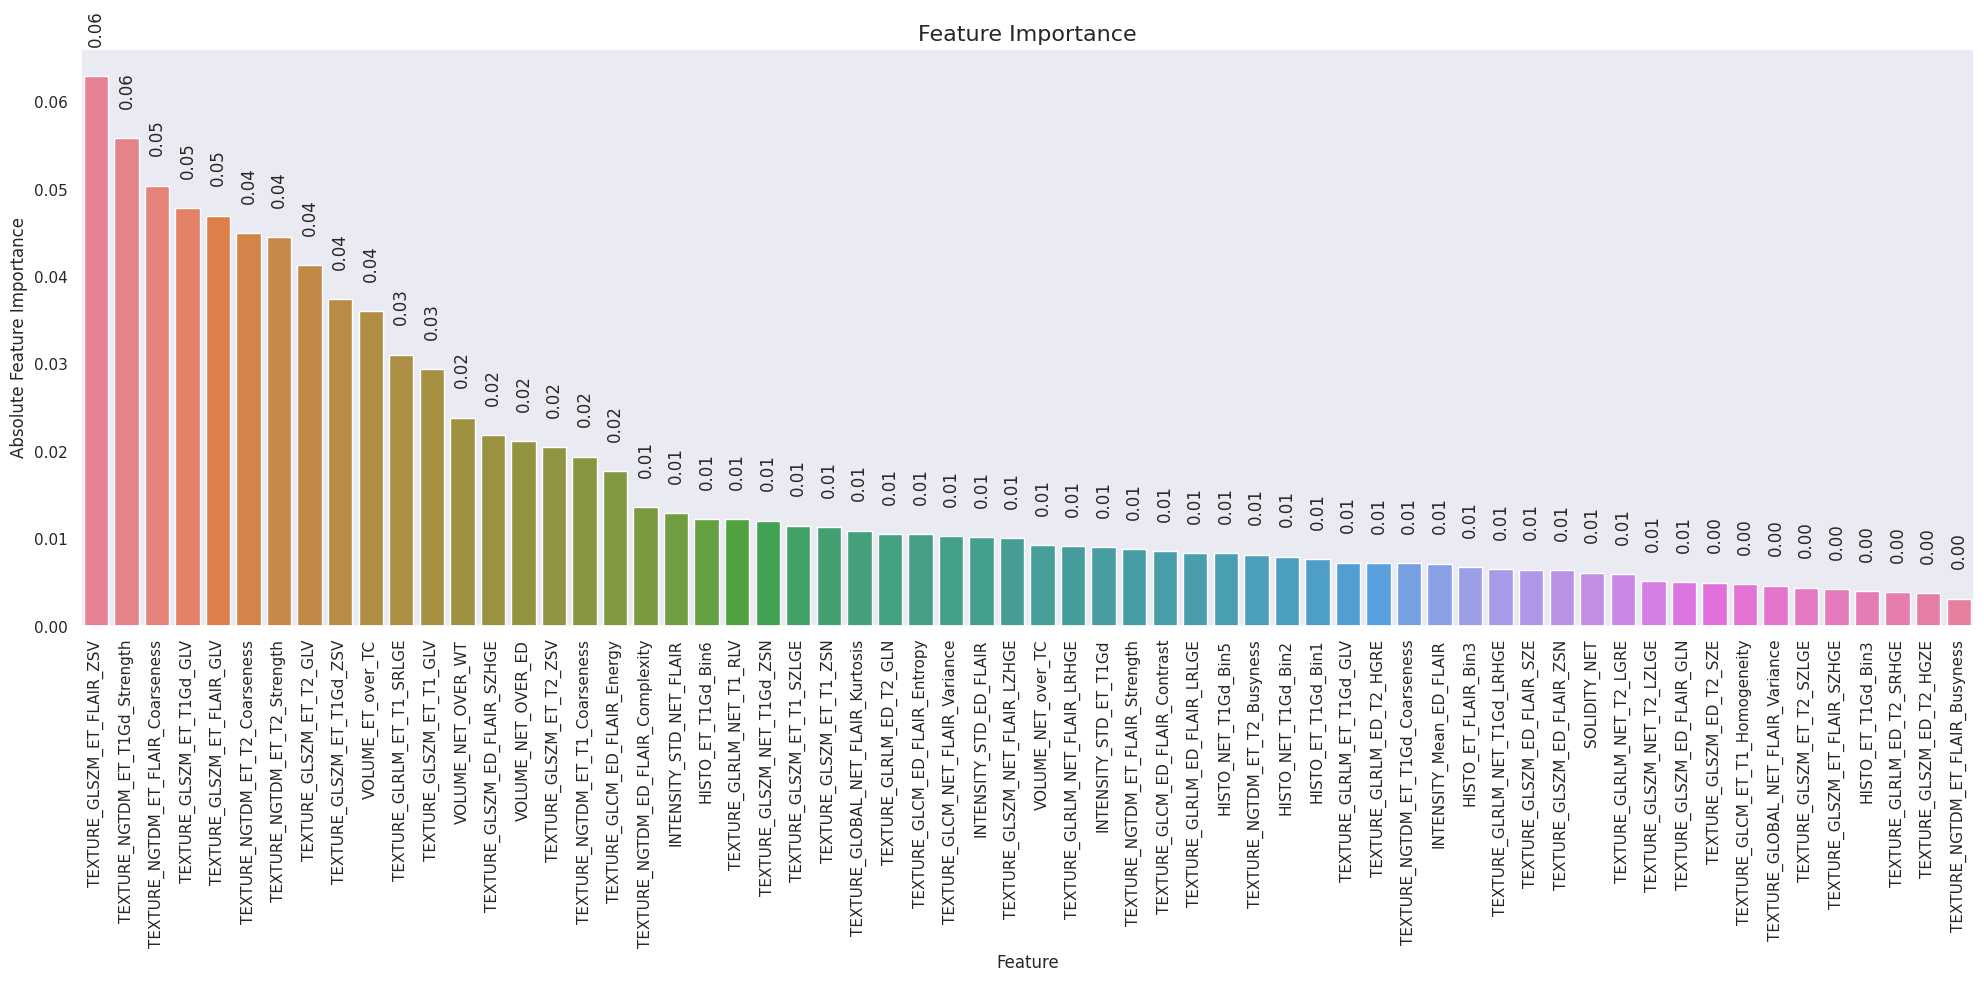

In [71]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier on the selected features
estimator = RandomForestClassifier(random_state=42)
estimator.fit(X_train_RFE, y_train)

# Get the feature importances
importances = estimator.feature_importances_

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = np.array(new_features)[sorted_idx]

# Define a color palette with multiple colors
colors = sns.color_palette('husl', len(sorted_features))

# Set the plot style and size
sns.set_style("dark")
plt.figure(figsize=(20, 10))

# Create a bar plot of feature importances
ax = sns.barplot(x=sorted_features, y=sorted_importances, palette=colors)

# Add values above each bar
for i, v in enumerate(sorted_importances):
    ax.text(i, v + 0.0039, '{:.2f}'.format(v), ha='center', fontsize=12, rotation=90)

# Set the x-axis labels to be rotated 90 degrees
plt.xticks(rotation=90)

# Set the x and y axis labels and title
plt.xlabel('Feature')
plt.ylabel('Absolute Feature Importance')
plt.title("Feature Importance", fontsize=16)

# Ensure tight layout and display the plot
plt.tight_layout()
featureimportance ='RFE_RF'
filename_cm = '/kaggle/working/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{featureimportance}_{comment}_CM.png"
plt.savefig(filename_cm)
plt.show()
# featureimportance ='RFE_RF'
# filename_cm = '/content/drive/MyDrive/nimad/Codes_with plot CM_7-16-2023/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{featureimportance}_{comment}.png"
# plt.savefig(filename_cm)
# plt.show()

# Kbest

In [72]:
# from sklearn.feature_selection import SelectKBest, mutual_info_classif

# # Create a KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)

# # Select the top K features based on mutual information
# k_best = SelectKBest(score_func=mutual_info_classif, k=70)  # Adjust 'k' as needed

# # Fit the feature selector to the training data and transform the data
# X_train_selected = k_best.fit_transform(X_train, y_train)
# X_test_selected = k_best.transform(X_test)

# # Transform the training and test data to keep only the selected features
# X_train_RFE = X_train_selected
# X_test_RFE = X_test_selected

In [73]:
# import seaborn as sns

# # Get the scores of the selected features
# scores = k_best.scores_

# # Get the indices of the selected features
# indices = k_best.get_support(indices=True)

# # Get the names of the selected features
# feature_names = X_train.columns[indices]

# # Create a dataframe with the feature importances
# feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': scores[indices]})

# # Sort the dataframe by importance
# feature_importances = feature_importances.sort_values('Importance', ascending=False)

# # Plot the feature importances
# plt.figure(figsize=(20, 10))
# sns.set_style("dark")
# ax = sns.barplot(x='Feature', y='Importance', data=feature_importances)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Absolute Feature Importance')
# plt.title("Feature Importance", fontsize=16)


# # Add the values of each feature above the corresponding bar
# for i, v in enumerate(feature_importances['Importance']):
#     ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', rotation=90)

# featureimportance ='Kbest'
# filename_cm = '/kaggle/working/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{featureimportance}_{comment}.png"
# plt.savefig(filename_cm)
# plt.show()

# Svm

In [74]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVC
# from sklearn.metrics import roc_auc_score
# import matplotlib.pyplot as plt
# import numpy as np

# # Create lists of kernels and C values to try
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# C_values = [0.3,0.4]

# # Initialize variables to store the best results
# best_kernel = None
# best_C = None
# best_features = None
# best_roc_auc = 0.0  # Initialize with a low value
# best_svm_classifier = None  # Store the best SVM classifier
# kernel = 'linear'
# for C in C_values:

#         estimator = SVC(kernel=kernel, C=C, random_state=42)
#         # Initialize an RFE selector with the SVM estimator
#         selector = RFE(estimator, n_features_to_select=50, step=3)

#         # Fit and transform using RFE
#         X_train_RFE = selector.fit_transform(X_train, y_train)
#         X_test_RFE = selector.transform(X_test)

#         # Train an SVM classifier using the selected features
#         svm_classifier = SVC(kernel=kernel, C=C, random_state=42)
#         svm_classifier.fit(X_train_RFE, y_train)
#         y_pred = svm_classifier.predict(X_test_RFE)
#         print("Phase 1")
#         # Calculate ROC AUC as the evaluation metric
#         roc_auc = roc_auc_score(y_test, y_pred)

#         # Check if this combination of kernel and C value resulted in a higher ROC AUC
#         if roc_auc > best_roc_auc:
#             best_roc_auc = roc_auc
#             best_kernel = kernel
#             best_C = C
#             best_features = selector.get_support()
#             best_svm_classifier = svm_classifier  # Store the best SVM classifier

# # Print the best kernel, C value, and the corresponding selected features
# print("Best Kernel:", best_kernel)
# print("Best C:", best_C)
# print("Best Features:", [feature for bool, feature in zip(best_features, X_train.columns) if bool])

# # Get feature importances from the best SVM classifier
# feature_importances = best_svm_classifier.coef_[0]  # For linear kernel SVM, use the coefficients as feature importances

# # Get indices that would sort the feature importances in descending order
# sorted_indices = np.argsort(np.abs(feature_importances))[::-1]

# # Get the names of the most important features
# top_features = [X_train.columns[i] for i in sorted_indices]
# # Plot feature importances
# plt.figure(figsize=(25, 12))  # Increase the width and height

# sns.set_style("dark")
# sns.barplot(x=top_features, y=np.abs(feature_importances[sorted_indices]), palette="husl")
# plt.xlabel("Feature")
# plt.ylabel("Absolute Feature Importance")
# plt.title("Feature Importance", fontsize=16)

# # Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90, fontsize=12)

# # Add values above the bars (adjust the vertical position to prevent overlap)
# for i, v in enumerate(np.abs(feature_importances[sorted_indices])):
#     plt.text(i, v + 0.01, str(round(v, 3)), color='black', fontsize=12, ha='center', va='bottom', rotation=90)

# # Rotate y-axis labels by 0 degrees
# plt.yticks(rotation=0, fontsize=12)

# # Save the plot
# plt.tight_layout()  # Ensure all elements fit within the figure boundaries
# featureimportance ='RFE_SVM'
# filename_cm = '/kaggle/working/ReviseCode/ResultsFile/Images/' + f"{timestamp}_featureimportance_{comment}_CM.png"
# plt.savefig(filename_cm)
# plt.show()

# X_train_RFE = X_train.loc[:, top_features]
# X_test_RFE = X_test.loc[:, top_features]
# # featureimportance ='RFE_SVM'
# # filename_cm = '/content/drive/MyDrive/nimad/Codes_with plot CM_7-16-2023/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{featureimportance}_{comment}.png"
# # plt.savefig(filename_cm)
# # plt.show()


## ML Models

In [75]:
CV = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Fun

In [76]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from datetime import datetime
import datetime

def find_best_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 1000)  # Create a range of thresholds
    best_threshold = None
    best_metric = 0

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        # print(f"Y_PRED_find_BEST= {y_pred}")
        metric = roc_auc_score(y_true, y_pred)  # You can choose the metric you want to optimize

        if metric > best_metric:
            best_metric = metric
            best_threshold = threshold

    return best_threshold
# def find_best_threshold_for_log_loss(y_true, y_pred_proba):
#     thresholds = np.linspace(0, 1, 1000)
#     best_threshold = None
#     best_neg_log_loss = float('inf')  # Initialize with a high value

#     for threshold in thresholds:
#         y_pred = (y_pred_proba > threshold).astype(int)
#         current_log_loss = -log_loss(y_true, y_pred)  # Note the negative sign here
#         if current_log_loss < best_neg_log_loss:
#             best_neg_log_loss = current_log_loss
#             best_threshold = threshold

#     return best_threshold

def fitandeval_CV(model, parameters, X_train, X_test,classifiers):
    grid = GridSearchCV(
        estimator=model,
        param_grid=parameters,
        scoring='roc_auc',
        n_jobs=10,
        cv=CV
    )

    grid.fit(X_train, y_train)
    print(grid.best_estimator_)
    print(grid.best_params_)
    best_model = grid.best_estimator_
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    y_scores = best_model.predict_proba(X_test)[:, 1]
    # Predict probabilities for the positive class
    print(f"{y_train} = y_train")
    print(f"{y_pred} = y_pred")
    print(f"{y_scores} = y_scores")
    best_threshold = find_best_threshold(y_test, y_scores)

    y_pred_thresholded = (y_scores >= best_threshold).astype(int)

    # Calculate metrics using the best threshold
    acc = accuracy_score(y_test, y_pred_thresholded)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    f1 = f1_score(y_test, y_pred_thresholded)
    print(f"{y_pred_thresholded} = y_pred_thresholded")
    auc = roc_auc_score(y_test, y_scores)  # Use original scores
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresholded).ravel()
    specificity = tn / (tn + fp)
    print(f"{tn}=tn, {fp}=fp, {fn}=fn, {tp}=tp")
    plt.figure()
    ax = plt.gca()
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    filename_roc = '/kaggle/working/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{classifiers}_{comment}_ROC.png"
    # filename_roc = '/content/drive/MyDrive/nimad/Codes_with plot CM_7-16-2023/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{classifiers}_{comment}_ROC.png"
    # Save the plot with the constructed filename
    plt.savefig(filename_roc)
    plt.show()

    metrics = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Specificity": specificity
    }

    std_deviation = {
        "Accuracy": np.std(acc),
        "Precision": np.std(precision),
        "Recall": np.std(recall),
        "F1 Score": np.std(f1),
        "AUC": np.std(auc),
        "Specificity": np.std(specificity)
    }

    print("Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    print("\nStandard Deviations:")
    for metric, value in std_deviation.items():
        print(f"{metric}: {value}")

    print(f"Best Threshold: {best_threshold}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_thresholded)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['LGG', 'HGG'], rotation=0)
    plt.yticks(tick_marks, ['LGG', 'HGG'])
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    filename_cm = '/kaggle/working/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{classifiers}_{comment}_CM.png"

    # filename_cm = '/content/drive/MyDrive/nimad/Codes_with plot CM_7-16-2023/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{classifiers}_{comment}_CM.png"
    plt.savefig(filename_cm)
    plt.show()
    # Create log file
    log_data = {
        'date': [datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
        'classifier': classifiers,
        'accuracy': [acc],
        'precision': [precision],
        'recall': [recall],
        'f1_score': [f1],
        'auc_score': [auc],
        'specificity': [specificity],
        'best_threshold': [best_threshold],
        'comment': [comment]
    }
    log_df = pd.DataFrame(log_data)
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
    log_file = f'{log_dir}/{user_name}.csv'
    if os.path.exists(log_file):
        log_df.to_csv(log_file, mode='a', header=False, index=False)
    else:
        log_df.to_csv(log_file, index=False)

    return acc, precision, recall, f1, auc, specificity, best_model

### XGB

In [77]:
# parameters_XGB= {
#     'max_depth': [10],
#     'n_estimators': [200],
#     'learning_rate': [0.01]
# }
# XGB= XGBClassifier(random_state = 42,objective="reg:squaredlogerror",)
parameters_XGB = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 380, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# parameters_XGB = {
#     'max_depth': range (2, 20, 1),
#     'n_estimators': range(60, 450, 20),
#     'learning_rate': [0.01],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.5, 1],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='reg:squaredlogerror', predictor=None, ...)
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1

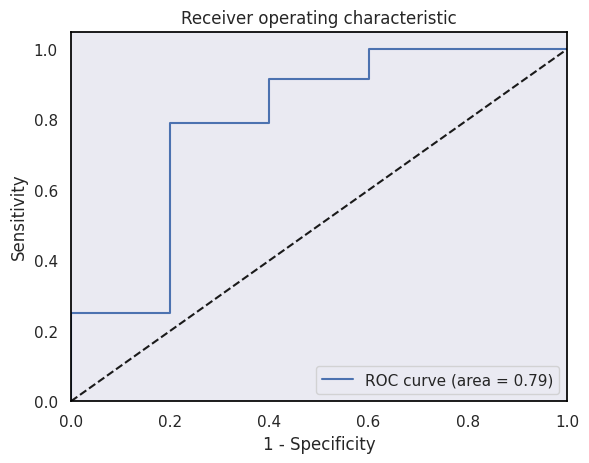

Metrics:
Accuracy: 0.7931034482758621
Precision: 0.95
Recall: 0.7916666666666666
F1 Score: 0.8636363636363635
AUC: 0.7916666666666666
Specificity: 0.8

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.6886886886886887


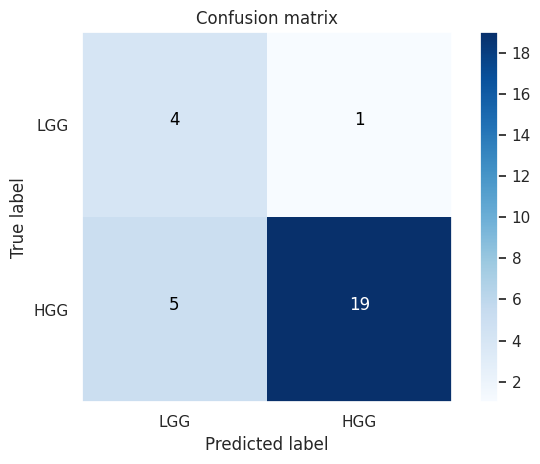

In [78]:
acc_XGB_RFE,precision_XGB_RFE,recall_XGB_RFE,f1_XGB_RFE,auc_XGB_RFE,specificity_XGB_RFE,best_XGB_RFE=fitandeval_CV(
    XGBClassifier(random_state = 42,objective="reg:squaredlogerror",) , parameters_XGB , X_train_RFE , X_test_RFE,classifiers = 'XGB')

### Random Forest

In [79]:
RF = RandomForestClassifier(random_state=42)#random_state=42

# parameters_RF = { 'n_estimators': [ 500],
#     'max_features': ['auto'],
#     'max_depth' : [12],
#     'criterion' :['gini']
#               }
parameters_RF = { 'n_estimators': [200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
              }



/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=200,
                       random_state=42)
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0] = y_pred
[0.69510248 0.69426213 0.78515286 0.54696934 0.67198843 0.71324207
 0.7868022  0.76830304 0.72189887 0.885      0.5310584  0.57496293
 0.73018553 0.765      0.50843363 0.81       0.7867381  0.66186167
 0.7317381  0.66394078 0.82       0.70359174 0.80675542 0.5329897
 0.65880945 0.58036273 0.73751648 0.79182685 0.35404325] = y_scores
[1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0] = y_pred_thresholded
5=tn, 0=fp, 3=fn, 21=tp


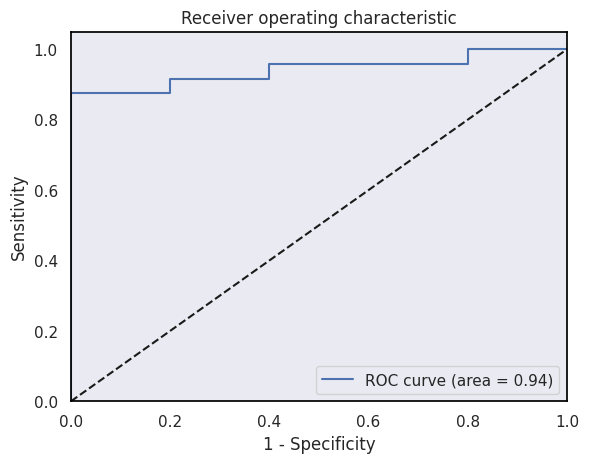

Metrics:
Accuracy: 0.896551724137931
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333
AUC: 0.9416666666666667
Specificity: 1.0

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.6596596596596597


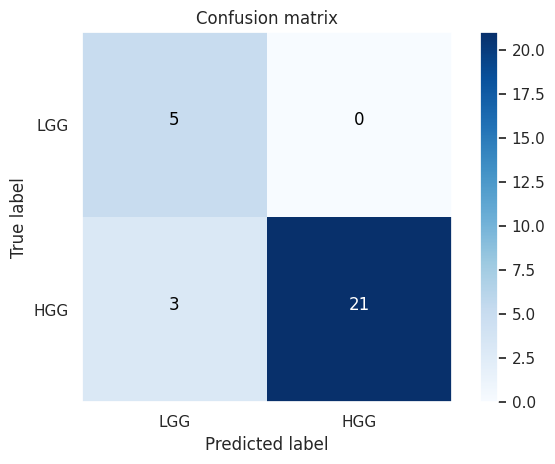

In [80]:
acc_RF_RFE,precision_RF_RFE,recall_RF_RFE,f1_RF_RFE,auc_RF_RFE, specificity_RF_RFE,best_RF_RFE=fitandeval_CV(
    RF , parameters_RF , X_train_RFE , X_test_RFE,classifiers = 'RF')

### DT Tuning

In [81]:
DT = DecisionTreeClassifier(random_state = 42)



parameters_DT = {
    'max_depth': [None],  # You can include None for unlimited depth
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],  # Vary the number of features considered at each split
    'class_weight': [None, 'balanced'],  # Consider balancing classes
}


/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

DecisionTreeClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=4, random_state=42)
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0] = y_pred
[0.25 0.25 0.25 0.75 0.6  0.   0.25 0.6  0.6  0.6  0.25 0.25 0.6  0.6
 1.   1.   1.   0.6  0.6  0.25 0.6  0.6  0.6  0.   0.6  0.6  0.25 0.6
 0.  ] = y_scores
[0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0] = y_pred_thresholded
4=tn, 1=fp, 7=fn, 17=tp


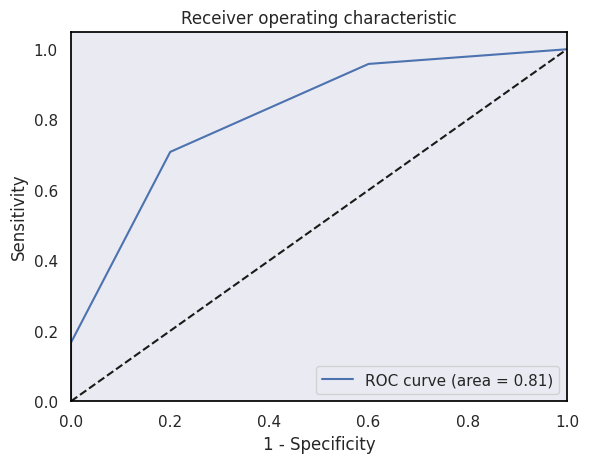

Metrics:
Accuracy: 0.7241379310344828
Precision: 0.9444444444444444
Recall: 0.7083333333333334
F1 Score: 0.8095238095238096
AUC: 0.8125
Specificity: 0.8

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.2502502502502503


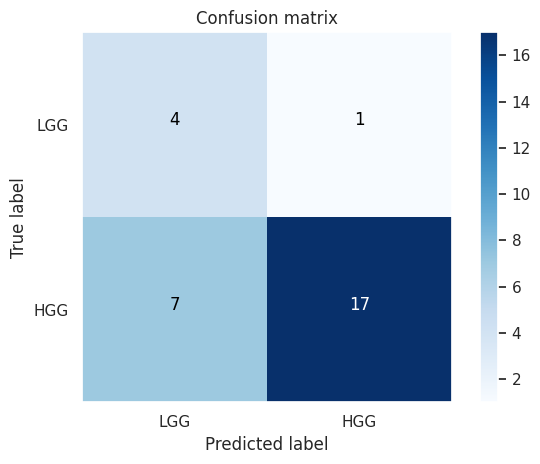

In [82]:
acc_DT_RFE,precision_DT_RFE,recall_DT_RFE,f1_DT_RFE,auc_DT_RFE, specificity_DT_RFE,best_DT_RFE=fitandeval_CV(
    DT , parameters_DT , X_train_RFE , X_test_RFE,classifiers = 'DT')

### SVM Tuning

In [83]:

SVM= SVC(random_state=42,probability=True)


# parameters_SVM = {'kernel':['linear','rbf'], 'gamma':[ 'auto'], 'C':[0.1,1,5], 'class_weight':['balanced']}

parameters_SVM = {'kernel':['linear','poly','rbf','sigmoid'],
       'gamma':['scale', 'auto'],
       'C':[0.05,0.1,0.3,0.4, 0.5,0.9, 1,1.2,2,3],
      #  'class_weight':['balanced']
       }




SVC(C=3, probability=True, random_state=42)
{'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0] = y_pred
[0.99999939 0.99999145 0.99999848 0.64300415 0.99686398 0.9963777
 0.99999224 0.9999879  0.99999653 0.99999996 0.94390627 0.89583076
 0.99601442 0.99999998 0.9549644  0.99998328 0.99615492 0.99999953
 0.99611797 0.9934108  0.99999918 0.99548108 0.99276819 0.99999837
 0.98007251 0.98584791 0.99999943 0.99999762 0.62138528] = y_scores
[1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0] = y_pred_thresholded
4=tn, 1=fp, 2=fn, 22=tp


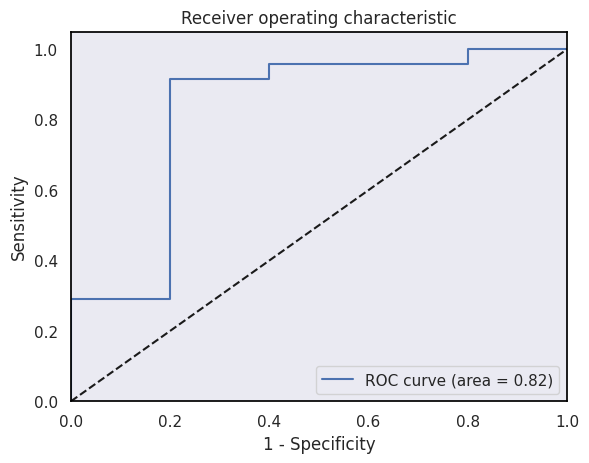

Metrics:
Accuracy: 0.896551724137931
Precision: 0.9565217391304348
Recall: 0.9166666666666666
F1 Score: 0.9361702127659574
AUC: 0.825
Specificity: 0.8

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.980980980980981


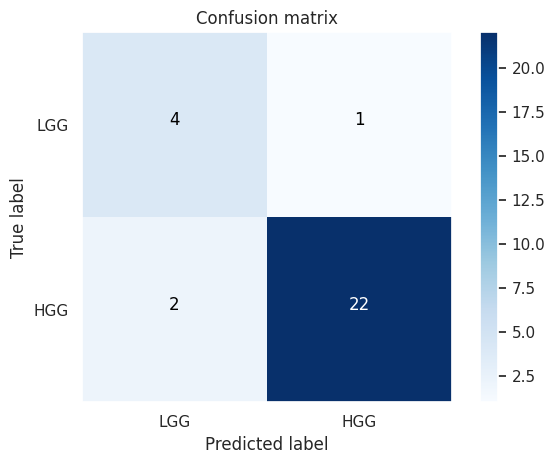

In [84]:
acc_SVM_RFE,precision_SVM_RFE,recall_SVM_RFE,f1_SVM_RFE,auc_SVM_RFE, specificity_SVM_RFE,best_SVM_RFE=fitandeval_CV(
    SVM, parameters_SVM , X_train_RFE , X_test_RFE,classifiers= 'SVM')

### LR Tuning

In [85]:

LR = LogisticRegression(random_state=42)


# parameters_LR = {'solver':['liblinear','sag','saga'],'C':[ 0.1, 1, 10] ,"max_iter":[150] ,"penalty":[ 'l1', 'l2',],"class_weight":['balanced']}
parameters_LR = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
       'C':[0.1,0.5, 1,2,3] ,
      "max_iter":[2000] ,"penalty":[ 'l1', 'l2', 'elasticnet'],
      # "class_weight":['balanced','None']
       }

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=3, max_iter=2000, penalty='l1', random_state=42,
                   solver='liblinear')
{'C': 3, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0] = y_pred
[9.91723575e-01 9.98931393e-01 9.86847828e-01 6.97512841e-02
 6.51721314e-01 9.99861903e-01 9.18094702e-01 8.50615511e-01
 8.93284333e-01 9.99755018e-01 3.10036527e-03 1.90161350e-02
 9.70231655e-01 9.99999663e-01 9.96229547e-01 9.65022167e-01
 4.91497700e-01 9.99147302e-01 9.41821911e-01 3.88674387e-01
 9.98498974e-01 9.77851523e-01 1.98384863e-01 7.12103085e-07
 8.18234963e-01 8.09420577e-01 9.85345487e-01 9.59219719e-01
 1.83663430e-04] = y_scores
[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0] = y_pred_thresholded
4=tn, 1=fp, 0=fn, 24=tp


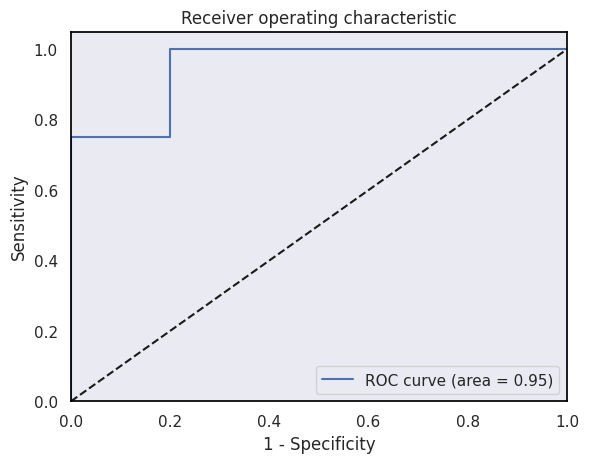

Metrics:
Accuracy: 0.9655172413793104
Precision: 0.96
Recall: 1.0
F1 Score: 0.9795918367346939
AUC: 0.9500000000000001
Specificity: 0.8

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.01901901901901902


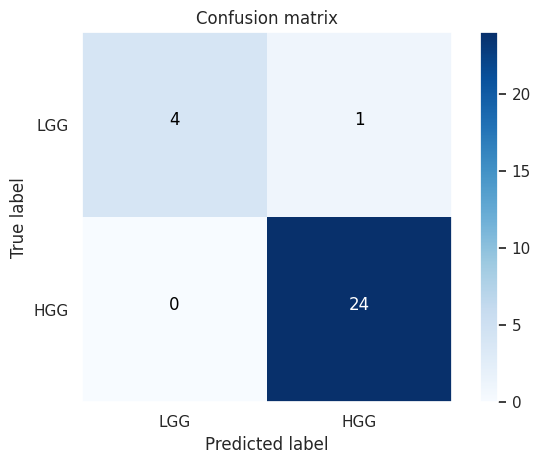

In [86]:
acc_LR_RFE,precision_LR_RFE,recall_LR_RFE,f1_LR_RFE,auc_LR_RFE, specificity_LR_RFE,best_LR_RFE=fitandeval_CV(
    LR, parameters_LR, X_train_RFE , X_test_RFE,classifiers = 'LR')

### GaussianNB

In [87]:
NB = GaussianNB()

# parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}


GaussianNB(var_smoothing=3.5111917342151273e-09)
{'var_smoothing': 3.5111917342151273e-09}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] = y_pred
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.] = y_scores
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] = y_pred_thresholded
0=tn, 5=fp, 0=fn, 24=tp


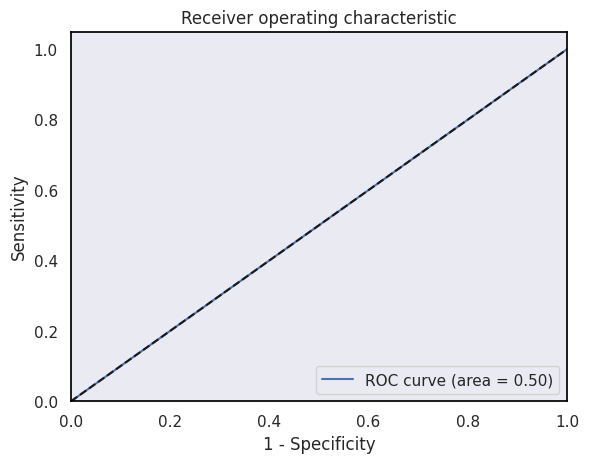

Metrics:
Accuracy: 0.8275862068965517
Precision: 0.8275862068965517
Recall: 1.0
F1 Score: 0.9056603773584906
AUC: 0.5
Specificity: 0.0

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.0


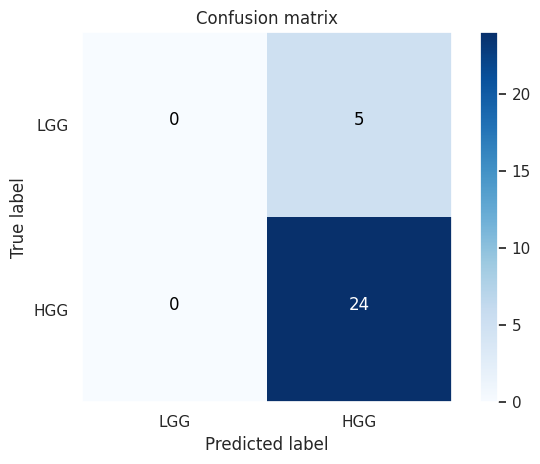

In [88]:
acc_NB_RFE,precision_NB_RFE,recall_NB_RFE,f1_NB_RFE,auc_NB_RFE, specificity_NB_RFE,best_NB_RFE=fitandeval_CV(
    NB, parameters_NB, X_train_RFE , X_test_RFE,classifiers = 'NB')

### KNN Tuning

In [89]:

KNN = KNeighborsClassifier()



# parameters_KNN = {'n_neighbors':range(1,21),'weights':['uniform', 'distance']}

parameters_KNN = {'n_neighbors':range(1,21),
       'weights':['uniform', 'distance']}


KNeighborsClassifier(n_neighbors=20, weights='distance')
{'n_neighbors': 20, 'weights': 'distance'}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0] = y_pred
[0.89836949 0.8014281  1.         0.10290726 1.         0.15291173
 0.95000088 1.         1.         1.         0.10123354 0.05255707
 1.         1.         0.1565377  0.90068641 1.         0.85333841
 0.60630555 0.90196421 1.         0.39715657 1.         0.14655384
 0.10054949 0.19790893 1.         1.         0.10027283] = y_scores
[1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0] = y_pred_thresholded
5=tn, 0=fp, 1=fn, 23=tp


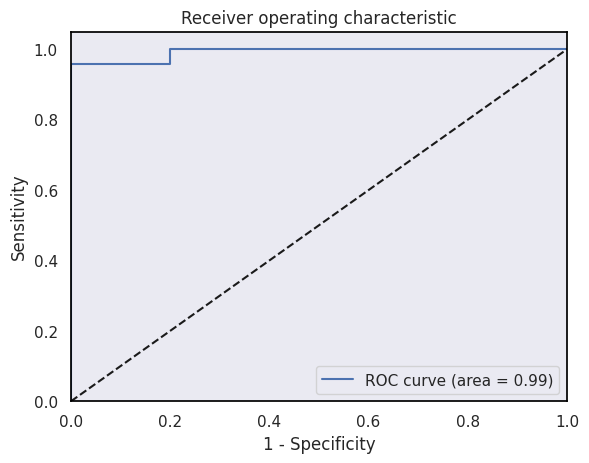

Metrics:
Accuracy: 0.9655172413793104
Precision: 1.0
Recall: 0.9583333333333334
F1 Score: 0.9787234042553191
AUC: 0.9916666666666667
Specificity: 1.0

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.14714714714714713


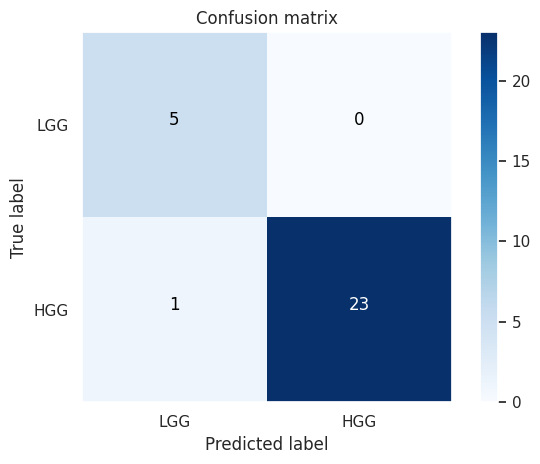

In [90]:
acc_KNN_RFE,precision_KNN_RFE,recall_KNN_RFE,f1_KNN_RFE,auc_KNN_RFE, specificity_KNN_RFE,best_KNN_RFE=fitandeval_CV(
    KNN, parameters_KNN, X_train_RFE , X_test_RFE,classifiers ='KNN')

### Bagging Tuning

In [91]:

Bag = BaggingClassifier(random_state=42)



# parameters_Bag = {'n_estimators':[200], 'max_samples':[3], 'max_features':[50], 'oob_score':[True,False]}

parameters_Bag = {'n_estimators':[10,15,20,50,100],
      #  'max_samples':[0.5,1.0,1.5],
      #  'max_features':[0.5,1.0,1.5],
      #  'oob_score':[True,False]
       }


BaggingClassifier(n_estimators=100, random_state=42)
{'n_estimators': 100}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0] = y_pred
[0.77 0.8  0.81 0.67 0.58 0.75 0.7  0.72 0.62 0.73 0.53 0.73 0.78 0.66
 0.65 0.7  0.72 0.69 0.79 0.66 0.7  0.74 0.62 0.55 0.74 0.63 0.75 0.65
 0.45] = y_scores
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0] = y_pred_thresholded
3=tn, 2=fp, 0=fn, 24=tp


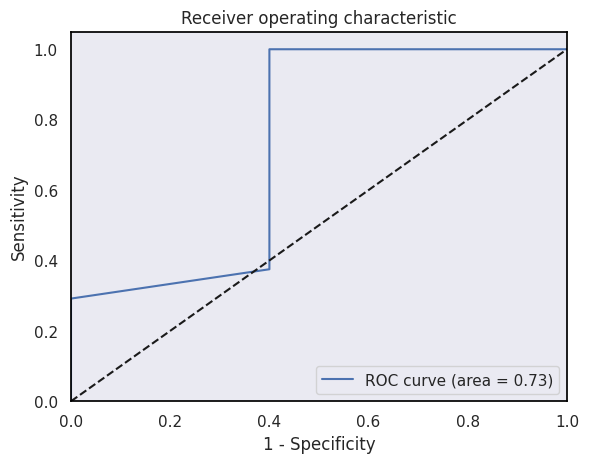

Metrics:
Accuracy: 0.9310344827586207
Precision: 0.9230769230769231
Recall: 1.0
F1 Score: 0.9600000000000001
AUC: 0.7333333333333334
Specificity: 0.6

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.5505505505505506


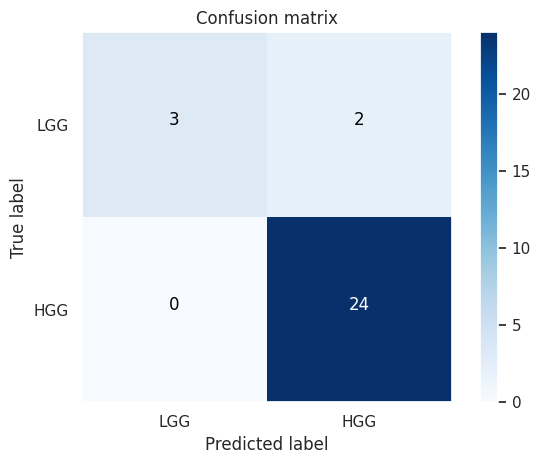

In [92]:
acc_Bag_RFE,precision_Bag_RFE,recall_Bag_RFE,f1_Bag_RFE,auc_Bag_RFE, specificity_Bag_RFE,best_Bag_RFE=fitandeval_CV(
    Bag, parameters_Bag, X_train_RFE , X_test_RFE,classifiers ='Bagging')

### ADABoost

In [93]:
from sklearn.ensemble import AdaBoostClassifier


In [94]:
from sklearn.ensemble import RandomForestClassifier

# Create RandomForestClassifier
# base_estimator = RandomForestClassifier(random_state=42)

# Create AdaBoost classifier with RandomForestClassifier as base estimator
ADA = AdaBoostClassifier(base_estimator=best_RF_RFE, random_state=42)

# Define the parameter grid for AdaBoost
parameters_ADA = {
  # Increase the number of estimators
    "n_estimators": [50, 100, 150, 200,300,400,500]  # Increase the number of AdaBoost estimators
}

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureW

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                         max_features='auto',
                                                         n_estimators=200,
                                                         random_state=42),
                   random_state=42)
{'n_estimators': 50}
0      1
1      1
2      1
3      1
4      1
      ..
339    0
340    0
341    0
342    0
343    0
Name: Grade, Length: 344, dtype: int64 = y_train
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0] = y_pred
[0.74058642 0.61781337 0.76575966 0.51069916 0.64799225 0.76445405
 0.74239188 0.76307767 0.71046273 0.86       0.43541256 0.62930897
 0.69124119 0.83       0.5522627  0.79003268 0.7316906  0.62604011
 0.69821292 0.62936855 0.78071292 0.78238121 0.76725995 0.54588332
 0.7832582  0.59732483 0.75701702 0.80050437 0.40082726] = y_scores
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0] = y_pred_thresholded
3=tn, 2=fp,

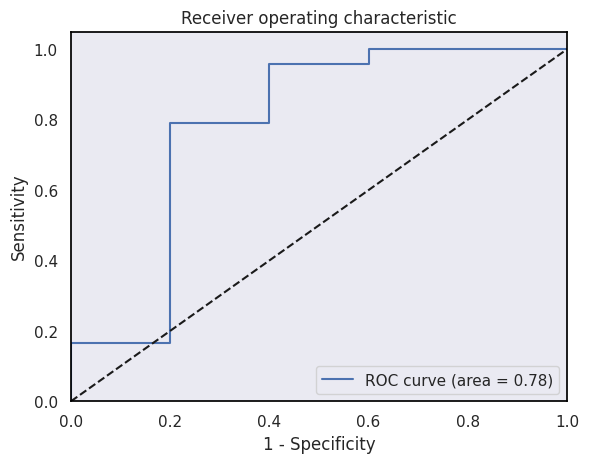

Metrics:
Accuracy: 0.896551724137931
Precision: 0.92
Recall: 0.9583333333333334
F1 Score: 0.9387755102040817
AUC: 0.7833333333333333
Specificity: 0.6

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.5465465465465466


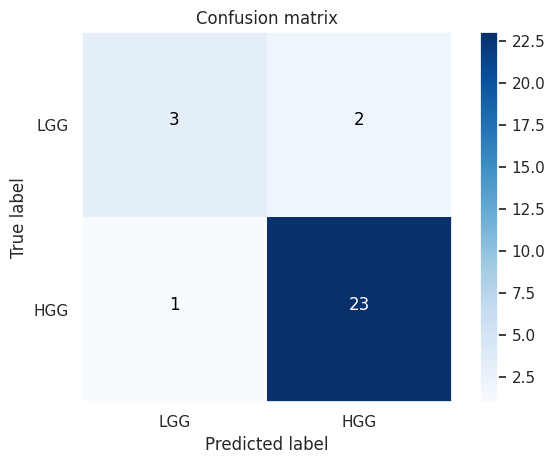

In [95]:
acc_ADA_RFE,precision_ADA_RFE,recall_ADA_RFE,f1_ADA_RFE,auc_ADA_RFE, specificity_ADA_RFE,best_ADA_RFE=fitandeval_CV(
    ADA, parameters_ADA, X_train_RFE , X_test_RFE,classifiers = 'ADCBoost')

### Voting Classifier

In [96]:
# import numpy as np
# from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# # def calculate_specificity(y_true, y_pred):
# #     cm = confusion_matrix(y_true, y_pred)
# #     tn = cm.diagonal(offset=0)
# #     fp = cm.sum(axis=0) - tn
# #     fn = cm.sum(axis=1) - tn
# #     tp = cm.sum() - tn - fp - fn
# #     specificity = tn / (tn + fp)
# #     return specificity
# def calculate_specificity(y_true,y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     FP = cm.sum(axis=0) - np.diag(cm)
#     FN = cm.sum(axis=1) - np.diag(cm)
#     TP = np.diag(cm)
#     TN = cm.sum() - (FP + FN + TP)
#     Specificity = TN / (TN + FP)
#     return np.mean(Specificity)

# def fitandeval_ens(best_model, X_train, X_test):
#     best_model.fit(X_train, y_train)
#     y_pred_proba = best_model.predict_proba(X_test)
#     y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels

#     acc = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='macro')
#     recall = recall_score(y_test, y_pred, average='macro')
#     f1 = f1_score(y_test, y_pred, average='macro')
#     auc = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
#     specificity = calculate_specificity(y_test, y_pred)

#     print(f'Accuracy {best_model} = {acc}')
#     print(f'Recall {best_model} = {recall}')
#     print(f'Precision {best_model} = {precision}')
#     print(f'F1 Score {best_model} = {f1}')
#     print(f'AUC {best_model} = {auc}')
#     print(f'Specificity {best_model} = {specificity}')

#     # Print classification report
#     report = classification_report(y_test, y_pred)
#     print(report)

#     return acc, precision, recall, f1, auc, specificity

In [97]:
# def fitandeval_ens(best_model,X_train , X_test):

#   best_model.fit(X_train , y_train)
#   y_pred=best_model.predict(X_test).reshape(-1,1)

#   acc=accuracy_score(y_test, y_pred,)
#   precision=precision_score(y_test , y_pred,average='weighted',)
#   recall=recall_score(y_test , y_pred,average='weighted')
#   f1=f1_score(y_test , y_pred , average='weighted')


#   print(f'accuracy {best_model} = {acc}')
#   print(f'recall {best_model} = {recall}')
#   print(f'precosion {best_model} = {precision}')
#   print(f'f1 Score {best_model} = {f1}')
#   print(classification_report(y_test , y_pred))






#   return acc,precision,recall,f1

In [98]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def find_best_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 1000)  # Create a range of thresholds
    best_threshold = None
    best_metric = 0

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        # print(f"Y_PRED_find_BEST= {y_pred}")
        metric = roc_auc_score(y_true, y_pred)  # You can choose the metric you want to optimize

        if metric > best_metric:
            best_metric = metric
            best_threshold = threshold

    return best_threshold
# def find_best_threshold(y_true, y_pred_proba):
# thresholds = np.linspace(0, 1, 1000)
# best_threshold = None
# best_neg_log_loss = float('inf')  # Initialize with a high value

#     for threshold in thresholds:
#         y_pred = (y_pred_proba > threshold).astype(int)
#         current_log_loss = -log_loss(y_true, y_pred)  # Note the negative sign here
#         if current_log_loss < best_neg_log_loss:
#             best_neg_log_loss = current_log_loss
#             best_threshold = threshold

#     return best_threshold

def fitandeval_ens(best_model, X_train, X_test,classifiers):
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    y_scores = best_model.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class
    print(f"{y_pred} = y_pred")
    print(f"{y_scores} = y_scores")
    best_threshold = find_best_threshold(y_test, y_scores)

    y_pred_thresholded = (y_scores >= best_threshold).astype(int)

    # Calculate metrics using the best threshold
    acc = accuracy_score(y_test, y_pred_thresholded)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    f1 = f1_score(y_test, y_pred_thresholded)
    print(f"{y_pred_thresholded} = y_pred_thresholded")
    auc = roc_auc_score(y_test, y_scores)  # Use original scores
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresholded).ravel()
    specificity = tn / (tn + fp)
    print(f"{tn}=tn, {fp}=fp, {fn}=fn, {tp}=tp")
    plt.figure()
    ax = plt.gca()
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    filename_roc = '/kaggle/working/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{classifiers}_{comment}_ROC.png"
    # filename_roc = '/content/drive/MyDrive/nimad/Codes_with plot CM_7-16-2023/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{classifiers}_{comment}_ROC.png"
    # Save the plot with the constructed filename
    plt.savefig(filename_roc)
    plt.show()


    metrics = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Specificity": specificity
    }

    std_deviation = {
        "Accuracy": np.std(acc),
        "Precision": np.std(precision),
        "Recall": np.std(recall),
        "F1 Score": np.std(f1),
        "AUC": np.std(auc),
        "Specificity": np.std(specificity)
    }

    print("Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    print("\nStandard Deviations:")
    for metric, value in std_deviation.items():
        print(f"{metric}: {value}")

    print(f"Best Threshold: {best_threshold}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_thresholded)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['LGG', 'HGG'], rotation=0)
    plt.yticks(tick_marks, ['LGG', 'HGG'])
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    filename_cm = '/kaggle/working/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{classifiers}_{comment}_CM.png"

    # filename_cm = '/content/drive/MyDrive/nimad/Codes_with plot CM_7-16-2023/ReviseCode/ResultsFile/Images/' + f"{timestamp}_{classifiers}_{comment}_CM.png"
    plt.savefig(filename_cm)
    plt.show()
    # Create log file
    log_data = {
        'date': [datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
        'classifier': classifiers,
        'accuracy': [acc],
        'precision': [precision],
        'recall': [recall],
        'f1_score': [f1],
        'auc_score': [auc],
        'specificity': [specificity],
        'best_threshold': [best_threshold],
        'comment': [comment]
    }
    log_df = pd.DataFrame(log_data)
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
    log_file = f'{log_dir}/{user_name}.csv'
    if os.path.exists(log_file):
        log_df.to_csv(log_file, mode='a', header=False, index=False)
    else:
        log_df.to_csv(log_file, index=False)

    return acc, precision, recall, f1, auc, specificity

In [99]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# def fitandeval_ens(best_model, X_train, X_test):
#     best_model.fit(X_train, y_train)
#     y_pred = best_model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     auc = roc_auc_score(y_test, y_pred)

#     specificity_scorer = make_scorer(recall_score, pos_label=0)
#     specificity_scores = cross_val_score(best_model, X_test, y_test, cv=CV, scoring=specificity_scorer)
#     specificity = np.mean(specificity_scores)
#     specificity_std = np.std(specificity_scores)

#     metrics = {
#         "Accuracy": acc,
#         "Precision": precision,
#         "Recall": recall,
#         "F1 Score": f1,
#         "AUC": auc,
#         "Specificity": specificity
#     }

#     std_deviation = {
#         "Accuracy": np.std(acc),
#         "Precision": np.std(precision),
#         "Recall": np.std(recall),
#         "F1 Score": np.std(f1),
#         "AUC": np.std(auc),
#         "Specificity": specificity_std
#     }

#     print("Metrics:")
#     for metric, value in metrics.items():
#         print(f"{metric}: {value}")

#     print("\nStandard Deviations:")
#     for metric, value in std_deviation.items():
#         print(f"{metric}: {value}")

#     return acc, precision, recall, f1, auc, specificity

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0] = y_pred
[0.79213456 0.74719515 0.81522551 0.55649697 0.78851138 0.68986393
 0.77693592 0.82286462 0.83434329 0.9035967  0.45087297 0.53109859
 0.85922657 0.87454377 0.749177   0.90916533 0.83635195 0.82055007
 0.81105582 0.68615133 0.88285114 0.78343965 0.7458494  0.49594024
 0.73840112 0.66372878 0.79212741 0.86749423 0.38515925] = y_scores
[1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0] = y_pred_thresholded
5=tn, 0=fp, 4=fn, 20=tp


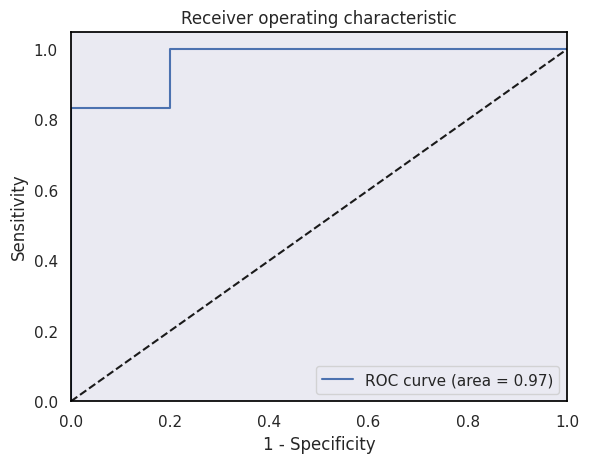

Metrics:
Accuracy: 0.8620689655172413
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091
AUC: 0.9666666666666668
Specificity: 1.0

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.7387387387387387


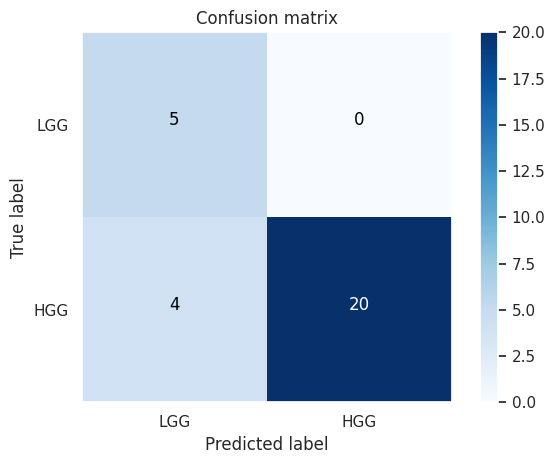

In [100]:
VC_RFE = VotingClassifier(estimators =[("XGB",best_XGB_RFE),("Random Forest",best_RF_RFE),("Decision Tree",best_DT_RFE),("SVM",best_SVM_RFE)
,("LR",best_LR_RFE),("Bagging",best_Bag_RFE),("KNN",best_KNN_RFE),("NB",best_NB_RFE) , ("ADA",best_ADA_RFE)],voting='soft', n_jobs = -1)

acc_Voting_RFE,precision_Voting_RFE,recall_Voting_RFE,f1_Voting_RFE,auc_Voting_RFE,specificity_Voting_RFE=fitandeval_ens(VC_RFE,X_train_RFE,X_test_RFE,classifiers = 'Voting')

### Stacking By StackingCVClassifier

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] = y_pred
[0.95278989 0.84837759 0.95177038 0.95691873 0.9833724  0.94975803
 0.93572347 0.97074297 0.98274162 0.99228127 0.79676967 0.96466461
 0.97883835 0.9899016  0.96923536 0.99303277 0.99120494 0.96976637
 0.97838077 0.95764295 0.98862283 0.9796042  0.99002621 0.95472883
 0.98847558 0.91414039 0.93418842 0.98882941 0.76294336] = y_scores
[0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0] = y_pred_thresholded
4=tn, 1=fp, 9=fn, 15=tp


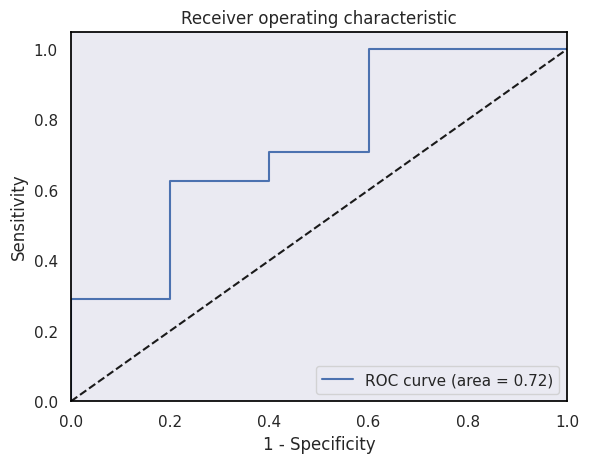

Metrics:
Accuracy: 0.6551724137931034
Precision: 0.9375
Recall: 0.625
F1 Score: 0.75
AUC: 0.725
Specificity: 0.8

Standard Deviations:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.0
Specificity: 0.0
Best Threshold: 0.964964964964965


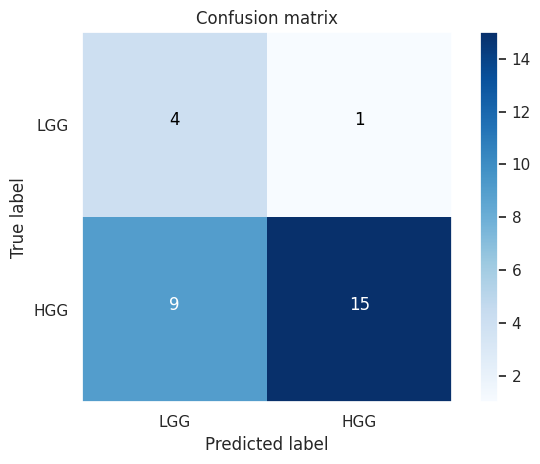

In [101]:
# define the base models
level0 = list()

level0.append(('XGB', best_XGB_RFE))
level0.append(('RF', best_RF_RFE))
level0.append(('DT', best_DT_RFE))
level0.append(('SVM', best_SVM_RFE))
level0.append(('LR', best_LR_RFE))
level0.append(('NB', best_NB_RFE))
level0.append(('KNN', best_KNN_RFE))
level0.append(('Bag', best_Bag_RFE))
level0.append(('ADA', best_ADA_RFE))

# define meta learner model
level1 = best_LR_RFE
# define the stacking ensemble
model_stack_RFE= StackingClassifier(estimators=level0, final_estimator=level1)

acc_stack_RFE,precision_stack_RFE,recall_stack_RFE,f1_stack_RFE,auc_stack_RFE,specificity_stack_RFE=fitandeval_ens(model_stack_RFE, X_train_RFE , X_test_RFE,classifiers = 'Stacking')

## Result of Recursinve Feature Elimination(RFE)  Features

In [102]:
dic4 = {
    "acc": [("{:.3f}".format(acc_LR_RFE)), ("{:.3f}".format(acc_SVM_RFE)), ("{:.3f}".format(acc_XGB_RFE)), ("{:.3f}".format(acc_RF_RFE)),
            ("{:.3f}".format(acc_DT_RFE)), ("{:.3f}".format(acc_NB_RFE)), ("{:.3f}".format(acc_KNN_RFE)), ("{:.3f}".format(acc_ADA_RFE)),
            ("{:.3f}".format(acc_Bag_RFE)), ("{:.3f}".format(acc_Voting_RFE)), ("{:.3f}".format(acc_stack_RFE))],
    "precision": [("{:.3f}".format(precision_LR_RFE)), ("{:.3f}".format(precision_SVM_RFE)), ("{:.3f}".format(precision_XGB_RFE)), ("{:.3f}".format(precision_RF_RFE)),
                  ("{:.3f}".format(precision_DT_RFE)), ("{:.3f}".format(precision_NB_RFE)), ("{:.3f}".format(precision_KNN_RFE)), ("{:.3f}".format(precision_ADA_RFE)),
                  ("{:.3f}".format(precision_Bag_RFE)), ("{:.3f}".format(precision_Voting_RFE)), ("{:.3f}".format(precision_stack_RFE))],
    "recall": [("{:.3f}".format(recall_LR_RFE)), ("{:.3f}".format(recall_SVM_RFE)), ("{:.3f}".format(recall_XGB_RFE)), ("{:.3f}".format(recall_RF_RFE)),
               ("{:.3f}".format(recall_DT_RFE)), ("{:.3f}".format(recall_NB_RFE)), ("{:.3f}".format(recall_KNN_RFE)), ("{:.3f}".format(recall_ADA_RFE)),
               ("{:.3f}".format(recall_Bag_RFE)), ("{:.3f}".format(recall_Voting_RFE)), ("{:.3f}".format(recall_stack_RFE))],
    "f1_score": [("{:.3f}".format(f1_LR_RFE)), ("{:.3f}".format(f1_SVM_RFE)), ("{:.3f}".format(f1_XGB_RFE)), ("{:.3f}".format(f1_RF_RFE)),
                 ("{:.3f}".format(f1_DT_RFE)), ("{:.3f}".format(f1_NB_RFE)), ("{:.3f}".format(f1_KNN_RFE)), ("{:.3f}".format(f1_ADA_RFE)),
                 ("{:.3f}".format(f1_Bag_RFE)), ("{:.3f}".format(f1_Voting_RFE)), ("{:.3f}".format(f1_stack_RFE))],
    "auc": [("{:.3f}".format(auc_LR_RFE)), ("{:.3f}".format(auc_SVM_RFE)), ("{:.3f}".format(auc_XGB_RFE)), ("{:.3f}".format(auc_RF_RFE)),
            ("{:.3f}".format(auc_DT_RFE)), ("{:.3f}".format(auc_NB_RFE)), ("{:.3f}".format(auc_KNN_RFE)), ("{:.3f}".format(auc_ADA_RFE)),
            ("{:.3f}".format(auc_Bag_RFE)), ("{:.3f}".format(auc_Voting_RFE)), ("{:.3f}".format(auc_stack_RFE))],
    "specificity": [("{:.3f}".format(specificity_LR_RFE)), ("{:.3f}".format(specificity_SVM_RFE)), ("{:.3f}".format(specificity_XGB_RFE)), ("{:.3f}".format(specificity_RF_RFE)),
                    ("{:.3f}".format(specificity_DT_RFE)), ("{:.3f}".format(specificity_NB_RFE)), ("{:.3f}".format(specificity_KNN_RFE)), ("{:.3f}".format(specificity_ADA_RFE)),
                    ("{:.3f}".format(specificity_Bag_RFE)), ("{:.3f}".format(specificity_Voting_RFE)), ("{:.3f}".format(specificity_stack_RFE))]
}

main_data3 = pd.DataFrame.from_dict(dic4, orient='index')
main_data3.columns = ['logistic regression', 'SVM', 'XGBoost', 'RandomForest', 'Decision Tree', 'NB', 'KNN', 'ABC', 'Bagging', 'Voting ensemble', 'Stacking ensemble']
main_data3 = main_data3.T
main_data3

,acc,precision,recall,f1_score,auc,specificity
logistic regression,0.966,0.960,1.000,0.980,0.950,0.800
SVM,0.897,0.957,0.917,0.936,0.825,0.800
XGBoost,0.793,0.950,0.792,0.864,0.792,0.800
RandomForest,0.897,1.000,0.875,0.933,0.942,1.000
Decision Tree,0.724,0.944,0.708,0.810,0.812,0.800
NB,0.828,0.828,1.000,0.906,0.500,0.000
KNN,0.966,1.000,0.958,0.979,0.992,1.000
ABC,0.897,0.920,0.958,0.939,0.783,0.600
Bagging,0.931,0.923,1.000,0.960,0.733,0.600
Voting ensemble,0.862,1.000,0.833,0.909,0.967,1.000


In [103]:
main_data3.to_csv(comment)

Text(0.5, 1.0, 'Accuracy')

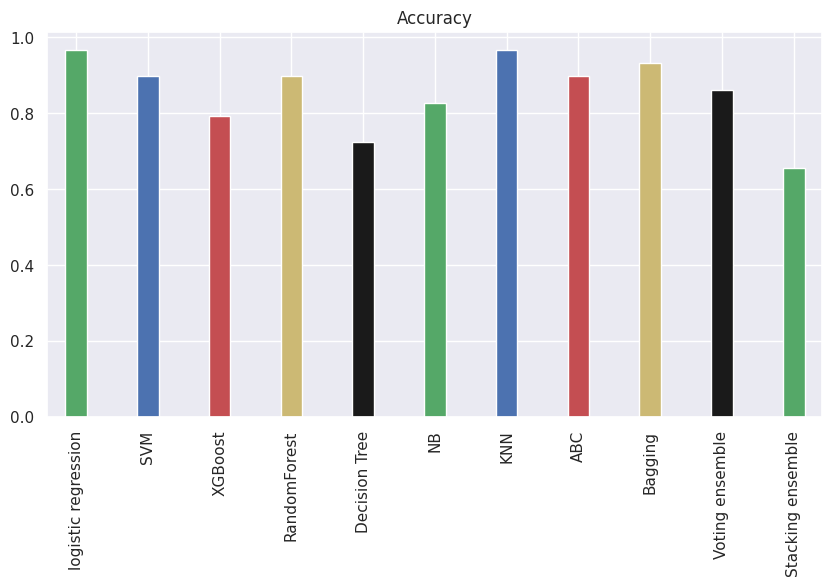

In [104]:
plt.figure(figsize=(10,5))
main_data3["acc"]=main_data3["acc"].astype(float)
main_data3["acc"].plot(kind="bar", grid=True , color=tuple(["g", "b","r","y","k"]) , width=0.3)
plt.title("Accuracy")

Text(0.5, 1.0, 'precision')

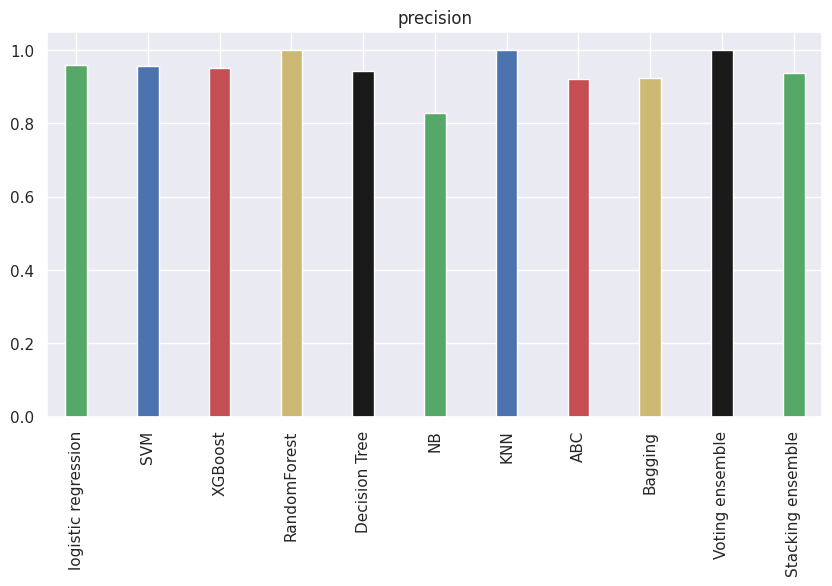

In [105]:
plt.figure(figsize=(10,5))
main_data3["precision"]=main_data3["precision"].astype(float)
main_data3["precision"].plot(kind="bar", grid=True , color=tuple(["g", "b","r","y","k"]) , width=0.3)
plt.title("precision")

Text(0.5, 1.0, 'recall')

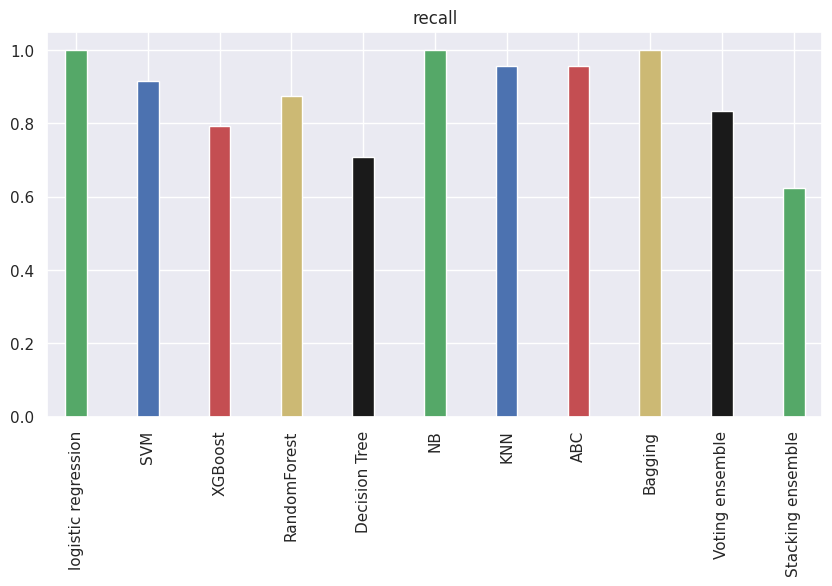

In [106]:
plt.figure(figsize=(10,5))
main_data3["recall"]=main_data3["recall"].astype(float)
main_data3["recall"].plot(kind="bar", grid=True , color=tuple(["g", "b","r","y","k"]) , width=0.3)
plt.title("recall")

Text(0.5, 1.0, 'f1_score')

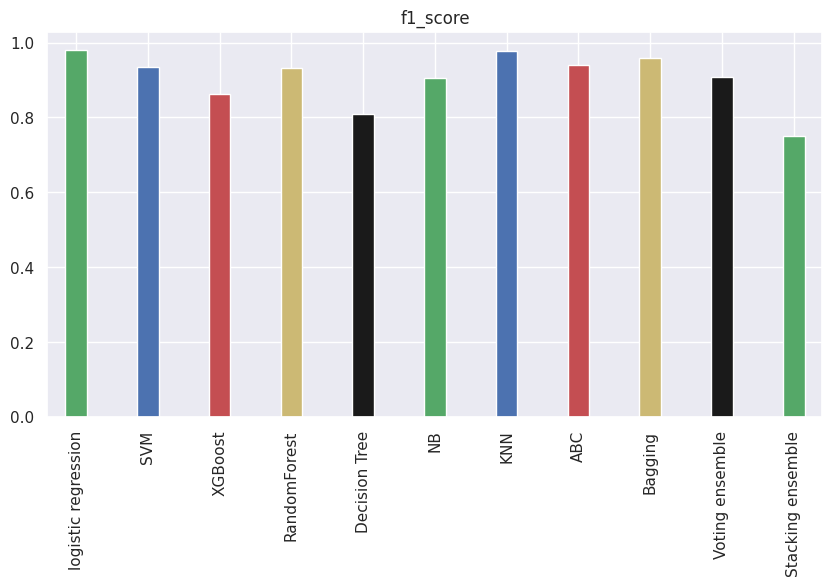

In [107]:
plt.figure(figsize=(10,5))
main_data3["f1_score"]=main_data3["f1_score"].astype(float)
main_data3["f1_score"].plot(kind="bar", grid=True , color=tuple(["g", "b","r","y","k"]) , width=0.3)
plt.title("f1_score")